*Eduardus Tjitrahardja | @edutjie | 2022*

# Clustering With K Means

## Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use("seaborn")

## Load Dataset

In [6]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.drop(["sepal width (cm)", "sepal length (cm)"], axis=1, inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Plotting Dataset

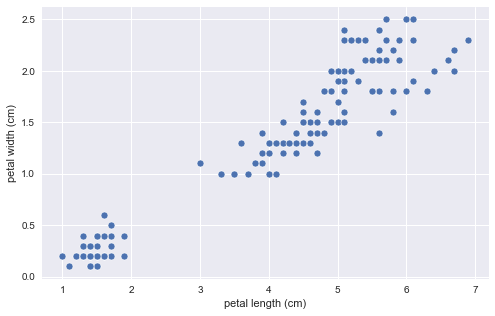

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", data=df)
plt.show()

## Data Preprocessing

In [15]:
scaler = MinMaxScaler()

In [16]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


## Determining Best K Using Elbow Method

In [30]:
k_range = range(1, 10)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667128,
 0.8538617353912239,
 0.6801035704886195,
 0.566351649289804,
 0.4869986050264929,
 0.4132667782512474]

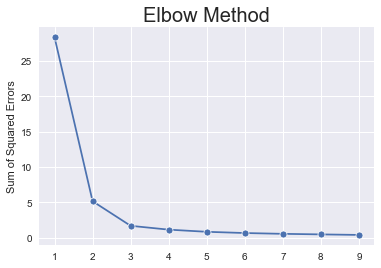

In [31]:
sns.lineplot(x=k_range, y=sse, marker="o")
plt.title("Elbow Method", size=20)
plt.ylabel("Sum of Squared Errors")
plt.show()

In [36]:
k_range = range(2, 11)
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_scaled, labels, metric = 'euclidean'))
  
sil

[0.7417156601556576,
 0.6762766606244309,
 0.6003662996594659,
 0.5705220157723893,
 0.5868305356059208,
 0.5793270656270705,
 0.5927182533291858,
 0.483089619360738,
 0.474091837702922]

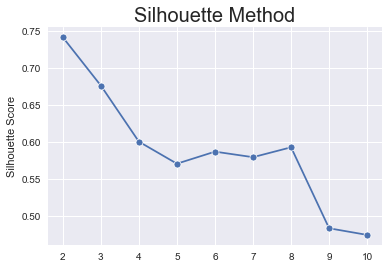

In [37]:
sns.lineplot(x=k_range, y=sil, marker="o")
plt.title("Silhouette Method", size=20)
plt.ylabel("Silhouette Score")
plt.show()

- Elbow: 3
- Silhouette: 2
- The best k is either 2 or 3.

## Creating Model

In [14]:
km = KMeans(n_clusters=3)

In [19]:
y_pred = km.fit_predict(df_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
df['cluster'] = y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [25]:
print(km.cluster_centers_)

print("\nAfter Inverse Scaling:")
centroids = scaler.inverse_transform(km.cluster_centers_)
print(centroids)

[[0.07830508 0.06083333]
 [0.55867014 0.51041667]
 [0.7740113  0.81510417]]

After Inverse Scaling:
[[1.462      0.246     ]
 [4.29615385 1.325     ]
 [5.56666667 2.05625   ]]


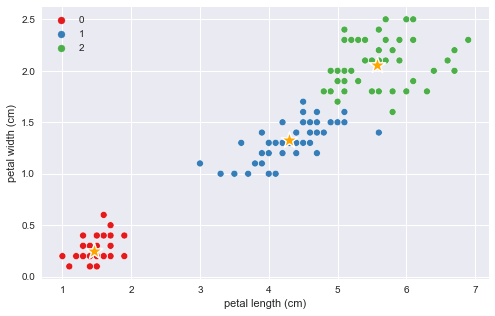

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="cluster", data=df, palette="Set1")
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color="orange", s=300, marker="*")
plt.show()

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')